In [1]:
import matplotlib.pyplot as plt
import pandas as pd


# Revenue data exploration

In [2]:
revenue_data = pd.read_excel('Barbora Homework.xlsx', sheet_name="Revenue")

In [3]:
print(revenue_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1749 non-null   int64  
 1   Revenue  1749 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.5 KB
None


In [4]:
revenue_data[revenue_data.isna().any(axis=1)]

,Date,Revenue


In [5]:
date_min = revenue_data[["Date"]].min()
print(date_min)

Date    20180101
dtype: int64


In [6]:
date_max = revenue_data[["Date"]].max()
print(date_max)

Date    20221028
dtype: int64


In [7]:
# Convert Date into a datetime data type
revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], format='%Y%m%d', errors='coerce')

In [8]:
print(revenue_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1749 non-null   datetime64[ns]
 1   Revenue  1749 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.5 KB
None


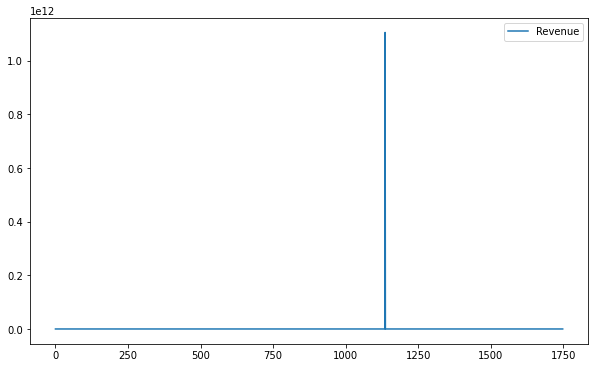

In [9]:
revenue_data.plot(y='Revenue', figsize=(10, 6))

In [10]:
# A data anomaly is present
revenue_data[["Revenue"]].describe()

,Revenue
count,1.749000e+03
mean,6.376979e+08
std,2.644243e+10
min,0.000000e+00
25%,3.269451e+06
50%,5.059526e+06
75%,7.218968e+06
max,1.105855e+12


In [11]:
revenue_data[revenue_data["Revenue"] > 1_000_000_000]

,Date,Revenue
1136,2021-02-19,1.105855e+12


In [12]:
# Lets look at the neighboring values
revenue_data[(revenue_data["Date"] > "2021-02-15") & (revenue_data["Date"] < "2021-02-23")]

,Date,Revenue
1133,2021-02-16,8.795164e+06
1134,2021-02-17,7.623763e+06
1135,2021-02-18,9.744710e+06
1136,2021-02-19,1.105855e+12
1137,2021-02-20,1.129638e+07
1138,2021-02-21,9.929621e+06
1139,2021-02-22,8.993474e+06


In [13]:
# Fix this by overwriting with the previous day revenue
print('Previous value: ' + str(revenue_data.at[1136,'Revenue']))
revenue_data.at[1136,'Revenue'] = revenue_data.at[1135,'Revenue']
print('New value: ' + str(revenue_data.at[1136,'Revenue']))

Previous value: 1105855458615.56
New value: 9744709.56


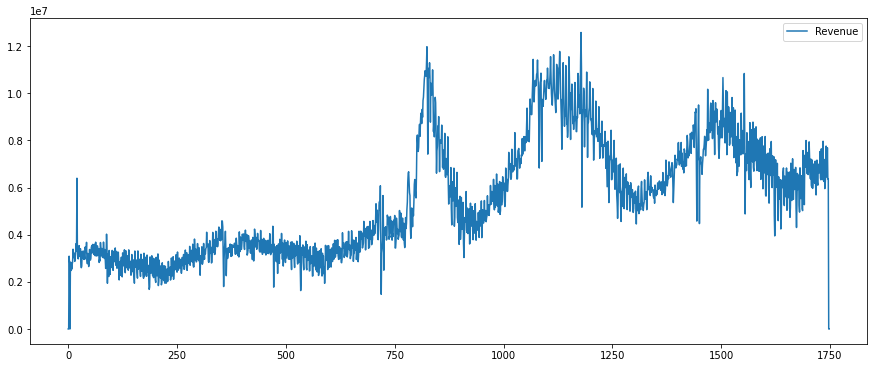

In [14]:
revenue_data.plot(y='Revenue', figsize=(15, 6))

In [15]:
# Convert Date column into an index
revenue_data.set_index('Date', inplace=True)

In [16]:
revenue_data[:5]

,Revenue
Date,
2018-01-01,0.00
2018-01-02,0.00
2018-01-03,3087464.68
2018-01-04,2770763.36
2018-01-05,0.00


In [17]:
# Check for missing dates
date_range = pd.date_range(start=revenue_data.index[0], end=revenue_data.index[-1], freq='D')
print(date_range.difference(revenue_data.index))

DatetimeIndex(['2018-04-01', '2018-12-25', '2019-01-01', '2019-04-21',
               '2019-12-25', '2020-01-01', '2020-04-12', '2020-12-25',
               '2021-01-01', '2021-04-04', '2021-12-25', '2022-01-01',
               '2022-04-17'],
              dtype='datetime64[ns]', freq=None)


In [18]:
# Fill up the date gaps
revenue_data = revenue_data.reindex(date_range, fill_value=0.00)

In [19]:
# recheck for missing dates
print(date_range.difference(revenue_data.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [20]:
# Fill up zeroed revenues
revenue_data[revenue_data["Revenue"] < 1000]

,Revenue
2018-01-01,0.0
2018-01-02,0.0
2018-01-05,0.0
2018-04-01,0.0
2018-12-25,0.0
2019-01-01,0.0
2019-04-21,0.0
2019-12-25,0.0
2020-01-01,0.0
2020-04-12,0.0


In [21]:
# Replace zeros with neighboring values
revenue_data.replace(to_replace = 0, method='ffill', inplace=True)
revenue_data.replace(to_replace = 0, method='bfill', inplace=True)

Revenue    None
dtype: object

In [22]:
# recheck for zeros
revenue_data[revenue_data["Revenue"] < 1000]

,Revenue


In [23]:
# check the replacement
revenue_data[:5]

,Revenue
2018-01-01,3087464.68
2018-01-02,3087464.68
2018-01-03,3087464.68
2018-01-04,2770763.36
2018-01-05,2770763.36


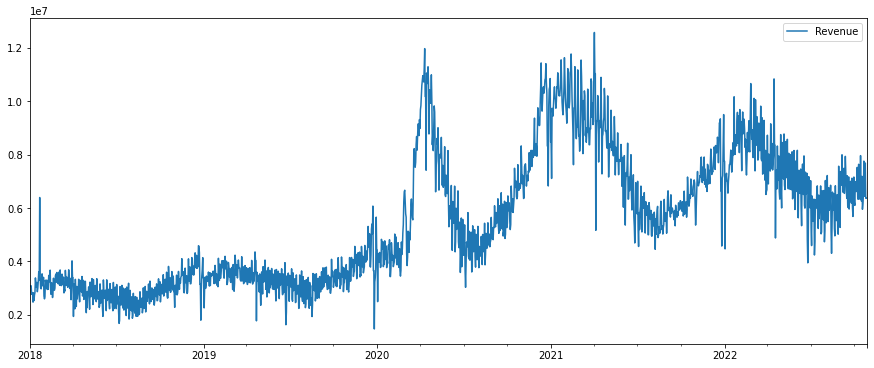

In [24]:
# check
revenue_data.plot(y='Revenue', figsize=(15, 6))

# Weather data exploration

In [25]:
weather_data = pd.read_excel('Barbora Homework.xlsx', sheet_name="Weather")

In [26]:
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86990 entries, 0 to 86989
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           86990 non-null  object 
 1   temperature    86990 non-null  int64  
 2   dew_point      86990 non-null  int64  
 3   humidity       86990 non-null  float64
 4   wind           86990 non-null  object 
 5   wind_speed     86990 non-null  int64  
 6   pressure       86990 non-null  int64  
 7   precipitation  86990 non-null  int64  
 8   condition      86990 non-null  object 
 9   dt             86990 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 6.6+ MB
None


In [27]:
weather_data[-10:]

,time,temperature,dew_point,humidity,wind,wind_speed,pressure,precipitation,condition,dt
86980,19:20:00,11,10,0.94,S,12,998,0,Mist,20221028
86981,19:50:00,11,10,0.94,S,12,997,0,Cloudy,20221028
86982,20:20:00,11,11,1.00,S,14,997,0,Cloudy,20221028
86983,20:50:00,11,11,1.00,S,19,997,0,Cloudy,20221028
86984,21:20:00,11,11,1.00,S,22,996,0,Cloudy,20221028
86985,21:50:00,11,11,1.00,S,22,996,0,Mist,20221028
86986,22:20:00,12,11,0.94,S,19,996,0,Mist,20221028
86987,22:50:00,12,11,0.94,SSW,19,996,0,Mist,20221028
86988,23:20:00,12,11,0.94,SSW,19,996,0,Mist,20221028
86989,23:50:00,12,11,0.94,SSW,19,996,0,Mist,20221028


In [28]:
# unfortunatelly precipitation column has no useful values
weather_data[weather_data['precipitation'] > 0]

,time,temperature,dew_point,humidity,wind,wind_speed,pressure,precipitation,condition,dt


In [29]:
# Aggregate for each day
weather_data_agg = weather_data.groupby(weather_data["dt"])["temperature","humidity","pressure","wind_speed"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [30]:
weather_data_agg[-5:]

,temperature,humidity,pressure,wind_speed
dt,,,,
20221023,8.541667,0.933542,989.895833,9.625000
20221024,8.895833,0.904583,993.062500,7.041667
20221025,11.208333,0.988750,989.708333,11.375000
20221027,9.895833,0.923333,1000.083333,8.916667
20221028,9.854167,0.980000,999.354167,13.500000


In [31]:
weather_data_agg.reset_index(inplace=True)

In [32]:
weather_data_agg[-5:]

,dt,temperature,humidity,pressure,wind_speed
1749,20221023,8.541667,0.933542,989.895833,9.625000
1750,20221024,8.895833,0.904583,993.062500,7.041667
1751,20221025,11.208333,0.988750,989.708333,11.375000
1752,20221027,9.895833,0.923333,1000.083333,8.916667
1753,20221028,9.854167,0.980000,999.354167,13.500000


In [33]:
weather_data_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           1754 non-null   int64  
 1   temperature  1754 non-null   float64
 2   humidity     1754 non-null   float64
 3   pressure     1754 non-null   float64
 4   wind_speed   1754 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 68.6 KB


In [34]:
# Convert dt string into a datetime
weather_data_agg['Date'] = pd.to_datetime(weather_data_agg['dt'], format='%Y%m%d', errors='coerce')

In [35]:
# Remove the dt column
weather_data_agg.drop(columns=['dt'], inplace=True)

In [36]:
# Convert Date column into an index
weather_data_agg.set_index('Date', inplace=True)

In [37]:
weather_data_agg[-5:]

,temperature,humidity,pressure,wind_speed
Date,,,,
2022-10-23,8.541667,0.933542,989.895833,9.625000
2022-10-24,8.895833,0.904583,993.062500,7.041667
2022-10-25,11.208333,0.988750,989.708333,11.375000
2022-10-27,9.895833,0.923333,1000.083333,8.916667
2022-10-28,9.854167,0.980000,999.354167,13.500000


# Join datasets

In [38]:
# Left join revenue with weather data on date
joined_df = pd.merge(revenue_data, weather_data_agg, left_index=True, right_index=True, how='left')

In [39]:
joined_df[-5:]

,Revenue,temperature,humidity,pressure,wind_speed
2022-10-24,7687252.60,8.895833,0.904583,993.062500,7.041667
2022-10-25,6363573.88,11.208333,0.988750,989.708333,11.375000
2022-10-26,6373218.32,NaN,NaN,NaN,NaN
2022-10-27,6373218.32,9.895833,0.923333,1000.083333,8.916667
2022-10-28,6373218.32,9.854167,0.980000,999.354167,13.500000


In [40]:
# There are missing values
joined_df.fillna(method='ffill', inplace=True)
joined_df.fillna(method='bfill', inplace=True)

In [41]:
joined_df[-5:]

,Revenue,temperature,humidity,pressure,wind_speed
2022-10-24,7687252.60,8.895833,0.904583,993.062500,7.041667
2022-10-25,6363573.88,11.208333,0.988750,989.708333,11.375000
2022-10-26,6373218.32,11.208333,0.988750,989.708333,11.375000
2022-10-27,6373218.32,9.895833,0.923333,1000.083333,8.916667
2022-10-28,6373218.32,9.854167,0.980000,999.354167,13.500000


# Export the dataset

In [42]:
# Now it looks much better, so we can export the dataset to train the models
joined_df.to_excel('Revenue_clean.xlsx')

# Correlation analysis

In [43]:
# Lets normalize the columns first
normalized_df = (joined_df - joined_df.min())/(joined_df.max() - joined_df.min())

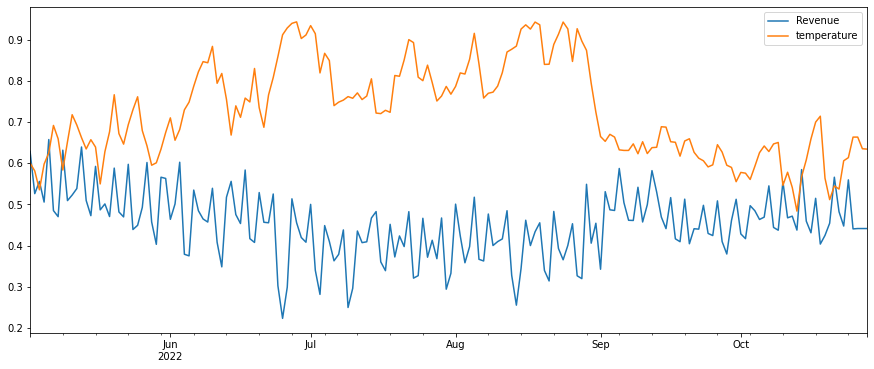

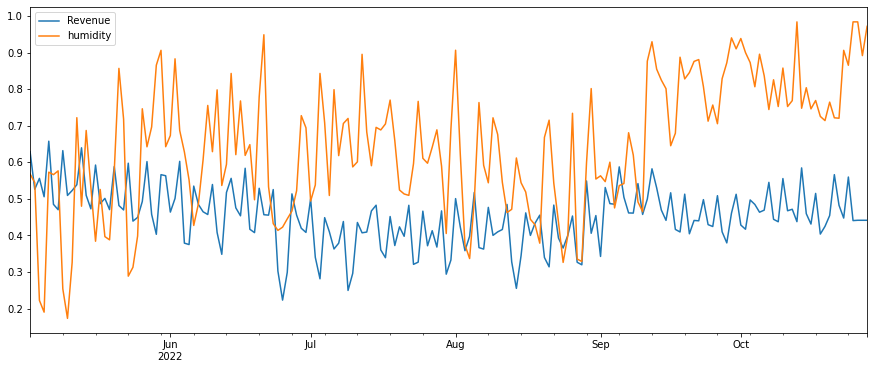

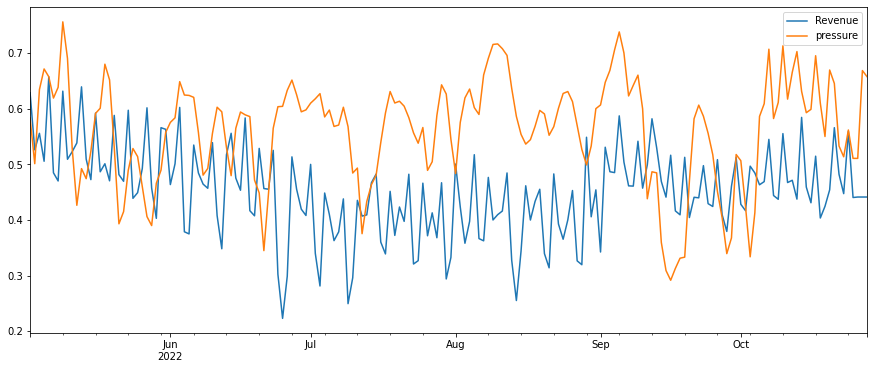

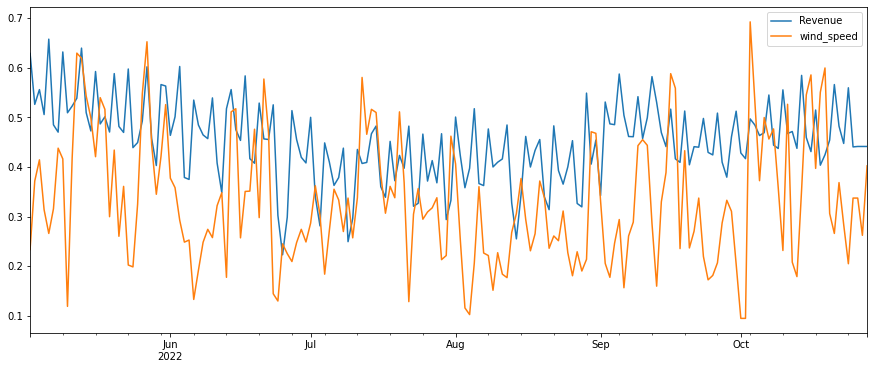

In [51]:
# Visualize in pairs
normalized_df[['Revenue','temperature']][-180:].plot(figsize=(15, 6))
normalized_df[['Revenue','humidity']][-180:].plot(figsize=(15, 6))
normalized_df[['Revenue','pressure']][-180:].plot(figsize=(15, 6))
normalized_df[['Revenue','wind_speed']][-180:].plot(figsize=(15, 6))

In [52]:
# Correlation matrix
cormat = normalized_df.corr()
round(cormat,2)

,Revenue,temperature,humidity,pressure,wind_speed
Revenue,1.00,-0.29,0.05,-0.02,0.10
temperature,-0.29,1.00,-0.42,0.04,-0.27
humidity,0.05,-0.42,1.00,-0.28,0.12
pressure,-0.02,0.04,-0.28,1.00,-0.36
wind_speed,0.10,-0.27,0.12,-0.36,1.00


There is a certain degree of correlation (-0.29) between Revenue and Temperature.